# EDA signals in the time doimain and in the frequency domain-chanels



In [2]:
import numpy as np
import pandas as pd
from readers_preprocess import read_filter
from time_to_freq_domain import eval_psd_not_modulated, eval_psd
import matplotlib.pyplot as plt
%matplotlib notebook


In [3]:


path = ['data_bci\\row_data\\subject1\\']
columns_to_read =  ['FC1', 'P3', 'class']

test_subject = '02'
freq = 512
train_subjects = ['01']

min_freq = 8
subject_results = []
knn_results = []



num_perseg = 128
num_overlap = 64
freq=512
min_freq = 8
max_freq = 45
classification_report = []

cutoff_beggining = 0
seq_len = freq
cut_step = int(seq_len/2)
window_train_data, window_filterd_train, window_train_anots, window_test_data, window_filterd_test, window_test_annoations = read_filter(path, train_subjects, test_subject, columns_to_read, cutoff_beggining, seq_len, cut_step)
   

row = window_train_data
filterd = window_filterd_train
psd_box =  eval_psd_not_modulated(row, num_perseg, num_overlap, freq, min_freq, max_freq)
filterd_psd_box =  eval_psd_not_modulated(filterd, num_perseg, num_overlap, freq, min_freq, max_freq)

psd_han =  eval_psd(row, num_perseg, num_overlap, freq, min_freq, max_freq)
filterd_psd_han =  eval_psd(filterd, num_perseg, num_overlap, freq, min_freq, max_freq)

In [4]:
def plot_eeg(eeg_data, keep_columns, freq=512):
        
    num_chanels = eeg_data.shape[1] 
    num_fig_rows = int((num_chanels+1)/2)
    time = np.arange(eeg_data.shape[0])/freq
    fig, axes = plt.subplots(2,num_fig_rows)
    axes = axes.flatten()
    
    for chanel_num in range(num_chanels):
        X = eeg_data[:,chanel_num]
        X = (X-X.min())/(X.max()-X.min())
        ax = axes[chanel_num]
        ax.plot(time, X, label=keep_columns[chanel_num], color='b')
        #ax.set_title(keep_columns[chanel_num]) 
        ax.legend()
        if chanel_num == num_chanels-1:
            ax.set_xlabel('Time [s]')
        ax.set_ylabel('Relative Amplitude')
        
        
def plot_freqs(eeg_data, keep_columns, freqs_values):
    # recover the frequencies

    num_chanels = eeg_data.shape[1] 
    num_fig_rows = int((num_chanels+1)/2)
    fig, axes = plt.subplots(num_fig_rows, 2)
    axes = axes.flatten()
    
    for chanel_num in range(num_chanels):
        X = eeg_data[:,chanel_num]
        X = (X-X.min())/(X.max()-X.min())
        ax = axes[chanel_num]

        ax.plot(freqs_values, X, label=keep_columns[chanel_num], color='b')

        
        ax.set_title(keep_columns[chanel_num]) 
        ax.legend()

        ax.set_xlabel('Frequencies [Hz]')
        ax.set_ylabel('Relative Energy')
        ax.legend()

In [5]:
sample_idx = 29

<IPython.core.display.Javascript object>


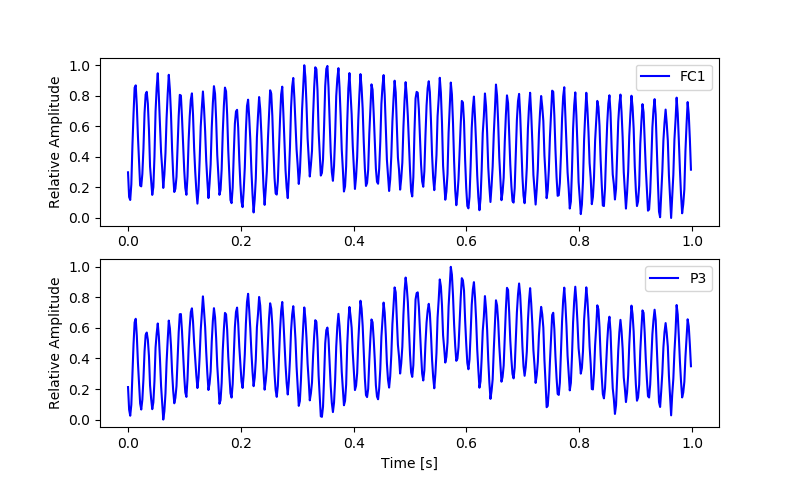

In [6]:
plot_eeg(row[sample_idx],columns_to_read)

<IPython.core.display.Javascript object>


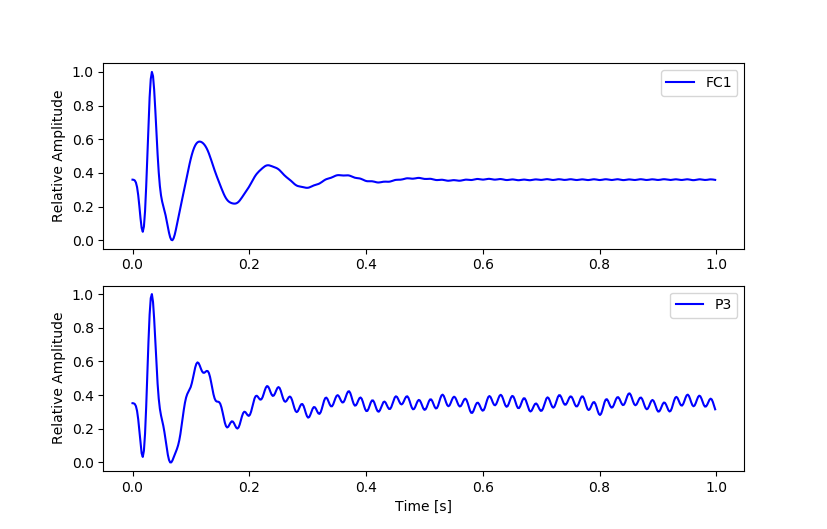

In [7]:
plot_eeg(filterd[sample_idx],columns_to_read)

<IPython.core.display.Javascript object>


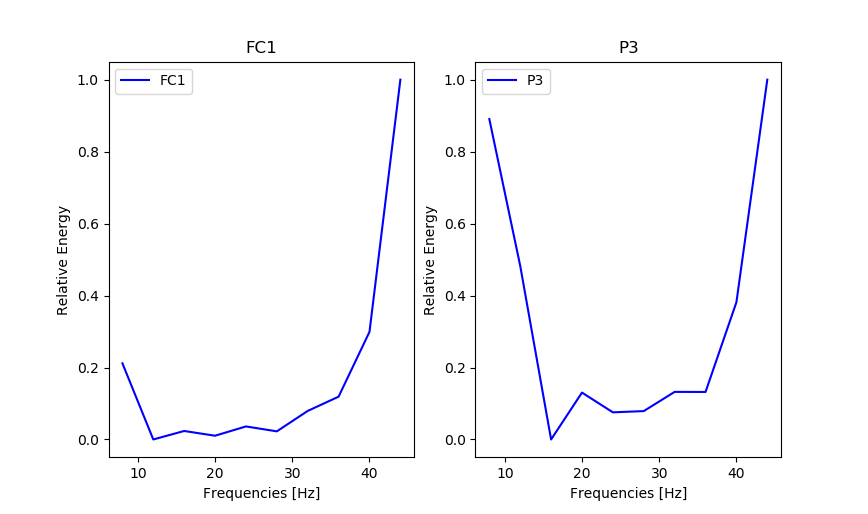

In [12]:
freqs_values = np.arange(8,45,4)
plot_freqs(psd_box[sample_idx], columns_to_read, freqs_values)

<IPython.core.display.Javascript object>


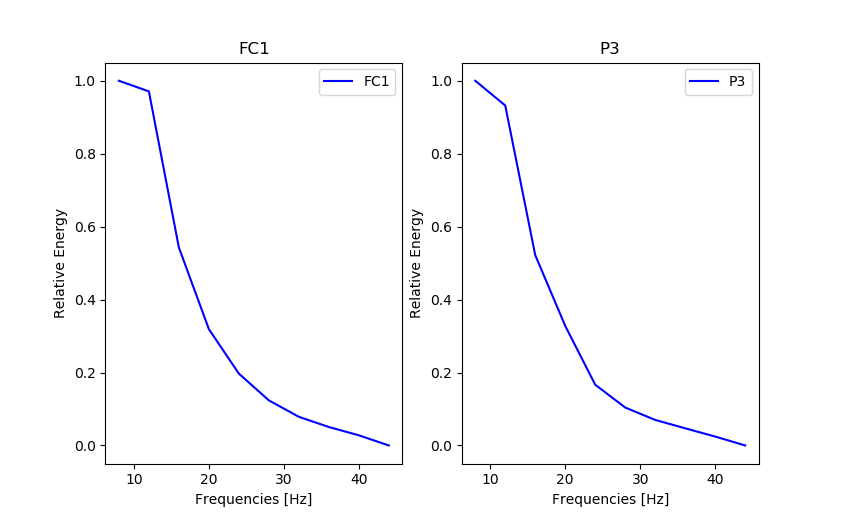

In [13]:
plot_freqs(filterd_psd_box[sample_idx], columns_to_read, freqs_values)

<IPython.core.display.Javascript object>


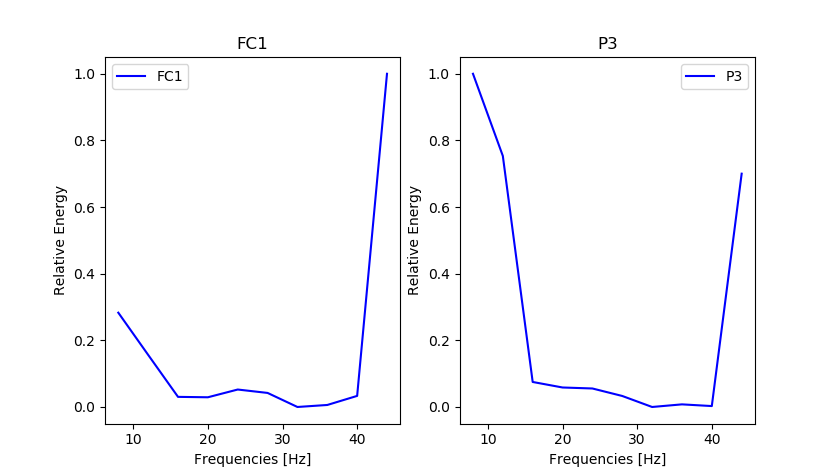

In [10]:
plot_freqs(psd_han[sample_idx], columns_to_read, freqs_values)

<IPython.core.display.Javascript object>


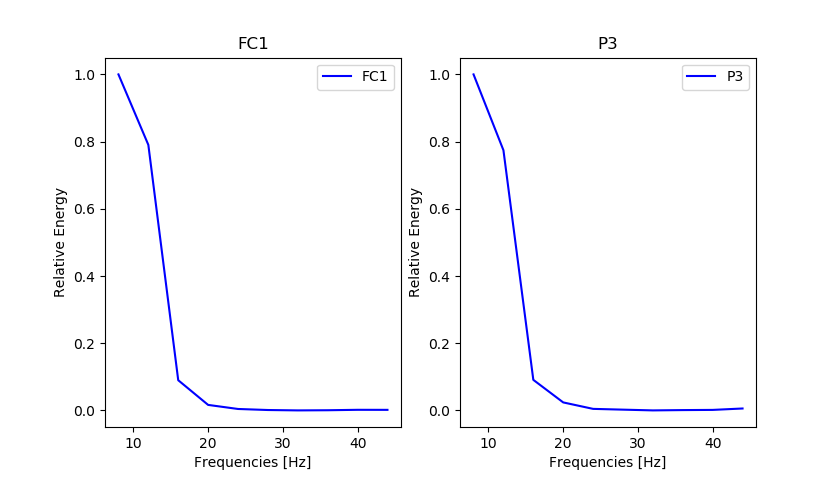

In [11]:
plot_freqs(filterd_psd_han[sample_idx], columns_to_read, freqs_values)